#### Step 1: Generate Noisy Data
We will create a dataset with multicollinearity, where some features are highly correlated. This often causes Linear Regression to overfit while Ridge Regression stabilizes the model.

#### Step 2: Train Both Models
We'll train both Linear Regression and Ridge Regression and compare:
- Coefficient values (to see how Ridge shrinks them)
- Mean Squared Error (MSE) (to see which model generalizes better)
- Regression Line (to visualize the difference)

Linear Regression MSE: 9.024070298804144
Ridge Regression MSE: 8.40772265075382


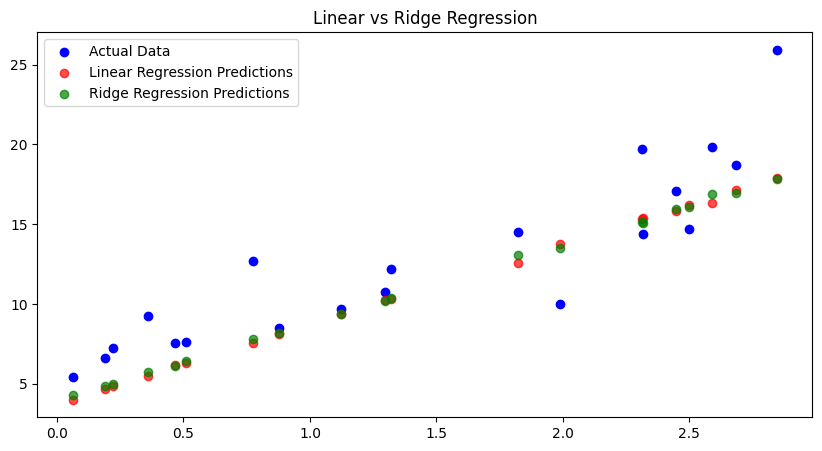

Linear Regression Coefficients: [ 6.28847291 -1.35454294]
Ridge Regression Coefficients: [3.44023186 1.47522167]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data with multicollinearity
np.random.seed(42)
X = 3 * np.random.rand(100, 1)  # One feature
X = np.c_[X, X + np.random.randn(100, 1) * 0.1]  # Add correlated feature (multicollinearity)

y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100) * 2  # True function + noise

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Train Ridge Regression
ridge_reg = Ridge(alpha=1)  # Regularization strength
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate Performance
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Linear Regression MSE:", mse_lin)
print("Ridge Regression MSE:", mse_ridge)

# Plot Predictions
plt.figure(figsize=(10,5))
plt.scatter(X_test[:, 0], y_test, color="blue", label="Actual Data")
plt.scatter(X_test[:, 0], y_pred_lin, color="red", label="Linear Regression Predictions", alpha=0.7)
plt.scatter(X_test[:, 0], y_pred_ridge, color="green", label="Ridge Regression Predictions", alpha=0.7)
plt.legend()
plt.title("Linear vs Ridge Regression")
plt.show()

# Compare Coefficients
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Ridge Regression Coefficients:", ridge_reg.coef_)


#### Expected Results
- Linear Regression may overfit (MSE might be higher).
- Ridge Regression stabilizes the model (MSE might be lower).
- Ridge Regression reduces the impact of multicollinearity.

Linear Regression MSE: 83.34927272752793
Ridge Regression MSE: 80.02932238683113
Linear Regression Coefficients: [-0.31666755 -4.65350076  9.66474125]
Ridge Regression Coefficients: [1.29311934 1.18273711 1.56930394]


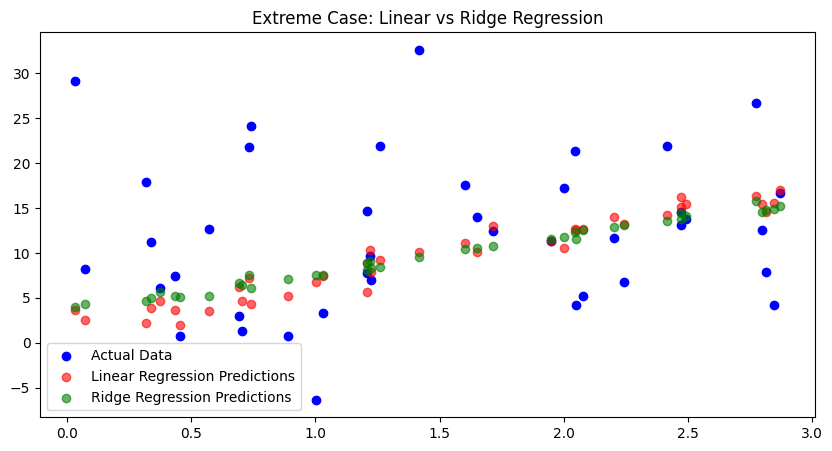

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate correlated features (Extreme multicollinearity)
X_base = 3 * np.random.rand(200, 1)  # Main feature
X1 = X_base + np.random.randn(200, 1) * 0.1  # Very similar feature
X2 = X_base + np.random.randn(200, 1) * 0.1  # Another similar feature
X3 = X_base + np.random.randn(200, 1) * 0.1  # Another highly correlated feature

# Combine them into a feature matrix
X = np.c_[X1, X2, X3]

# Generate target variable with noise
y = 4 + 3 * X1[:, 0] + 2 * X2[:, 0] - 2 * X3[:, 0] + np.random.randn(200) * 10  # Large noise added

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Train Ridge Regression with strong regularization
ridge_reg = Ridge(alpha=50)  # High regularization to stabilize
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate performance
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Linear Regression MSE:", mse_lin)
print("Ridge Regression MSE:", mse_ridge)

# Compare Coefficients
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Ridge Regression Coefficients:", ridge_reg.coef_)

# Plot Predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:, 0], y_test, color="blue", label="Actual Data")
plt.scatter(X_test[:, 0], y_pred_lin, color="red", label="Linear Regression Predictions", alpha=0.6)
plt.scatter(X_test[:, 0], y_pred_ridge, color="green", label="Ridge Regression Predictions", alpha=0.6)
plt.legend()
plt.title("Extreme Case: Linear vs Ridge Regression")
plt.show()


#### Expected Results
- Linear Regression MSE will be HUGE
    - It will overfit because of the high multicollinearity and large noise.
    - Coefficients will be wildly large and unstable.
- Ridge Regression MSE will be lower
    - Ridge will shrink coefficients, preventing instability.
    - Predictions will be much smoother and generalize better.